# Wrangle and Analyse Data of tweet archive WeRateDogs 

In [1]:
#Import of necessary libraries to work
import pandas as pd
import numpy as np
import requests
import tweepy
import json

from timeit import default_timer as timer

## Gathering data

### Gathering WeRateDogs Twitter archive (CSV)

In [2]:
#Read in the data from csv given to us
df_1 = pd.read_csv('project_files/twitter-archive-enhanced.csv')
df_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Gathering tweet image predictions (TSV)

In [3]:
#Gathering programmatically image predictions from Udacity's server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('project_files/image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Read the received tsv file into a DataFrame
df_2 = pd.read_csv('project_files/image-predictions.tsv', sep = '\t')
df_2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Gathering from the Twitter API (JSON)

In [5]:
## This code below was used to get required data via the Twitter API.

## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

## These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

## NOTE TO REVIEWER: 
## The following code is based on the example provided by Udacity for students
## who have troubles accessing Twitter API


tweet_ids = df_1.tweet_id.values

## Query Twitter's API for JSON data for each tweet ID in the Twitter archive

fails_dict = {}

## Save each tweet's returned JSON as a new line in a .txt file
with open('project_files/tweet_json.txt', 'w') as outfile:
    
    ## This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')

        except tweepy.TweepError as err:
            fails_dict[tweet_id] = err
            pass

print(fails_dict)

In [6]:
#Get json data from twitter API
useful_data = ['id', 'retweet_count', 'favorite_count']

#Create a list
list_rows = []
with open('project_files/tweet_json.txt', 'r') as r: 
    json_data = r.readline()
    while json_data:
        dictionnary = json.loads(json_data)
        data_row = dict((i, dictionnary[i]) for i in useful_data)
        list_rows.append(data_row)
        json_data = r.readline()

In [7]:
#Create DataFrame   
df_3 = pd.DataFrame.from_dict(list_rows)
df_3.head(3)

,favorite_count,id,retweet_count
0,35024,892420643555336193,7356
1,30332,892177421306343426,5485
2,22802,891815181378084864,3627


## Assessing data

### Assessing the twitter archive from csv file

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1787,677565715327688705,NaN,NaN,2015-12-17 19:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677565715...,6,10,None,None,None,None,None
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been informed by multiple sources that th...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
453,818588835076603904,NaN,NaN,2017-01-09 22:42:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chelsea. She forgot how...,7.735476e+17,4.196984e+09,2016-09-07 15:44:53 +0000,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,None,None,pupper,None
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None


In [10]:
df_1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
df_1['name'].value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Tucker           10
Penny            10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
an                7
Buddy             7
Bailey            7
Toby              7
Bella             6
Stanley           6
Rusty             6
Koda              6
Jack              6
Scout             6
Leo               6
Milo              6
Dave              6
Jax               6
Oscar             6
Phil              5
               ... 
Autumn            1
Fabio             1
Gerbald           1
Rover             1
Oreo              1
Snoop             1
Clarkus           1
Sora              1
Willem            1
Malikai           1
Winifred          1
Pinot             1
Cleopatricia      1
Pepper            1
Marq              1
Rorie             1
Pumpkin           1
unacceptable      1
Opie              1


In [12]:
import re
#Check the column 'name' for incorrect names besides value 'None'
incorrect_name = df_1[df_1['name'].str.match('^[a-z]') == True]
incorrect_name['name'].value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
mad              2
getting          2
not              2
unacceptable     1
old              1
such             1
light            1
my               1
life             1
space            1
officially       1
incredibly       1
infuriating      1
this             1
by               1
all              1
his              1
Name: name, dtype: int64

In [13]:
#Check for duplicates
sum(df_1.duplicated())

0

In [14]:
#Check which columns have missing values
df_1.columns[df_1.isnull().any()]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls'],
      dtype='object')

In [15]:
#Count values for dog's stage
print(df_1.doggo.value_counts(), '\n')
print(df_1.floofer.value_counts(), '\n')
print(df_1.pupper.value_counts(), '\n')
print(df_1.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64


### Assessing the tweet image predictions from tsv file

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
#Check for duplicates
sum(df_2.duplicated())

0

In [19]:
#Checking for rows with non-dog breeds
non_dog = df_2.query('p1_dog == False & p2_dog == False & p3_dog == False')
non_dog.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
140,668544745690562560,https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg,1,bearskin,0.427870,False,bow,0.258858,False,panpipe,0.021563,False
182,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False
1329,757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False
245,670468609693655041,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,minivan,0.730152,False,beach_wagon,0.078661,False,car_wheel,0.064346,False
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
1723,819924195358416896,https://pbs.twimg.com/ext_tw_video_thumb/81992...,1,bathtub,0.100896,False,shower_curtain,0.091866,False,tub,0.049176,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,0.114071,False,common_iguana,0.043255,False
687,684122891630342144,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,1,cheetah,0.822193,False,Arabian_camel,0.046976,False,jaguar,0.025785,False
795,690938899477221376,https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg,1,geyser,0.370318,False,seashore,0.274888,False,beacon,0.046397,False
1093,719704490224398336,https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg,1,home_theater,0.059033,False,window_shade,0.038299,False,bathtub,0.035528,False


In [20]:
#Number of rows with non-dog breeds
non_dog.shape[0]

324

### Assessing the data from the json file from twitter API

In [21]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
id                2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [22]:
df_3.head(3)

,favorite_count,id,retweet_count
0,35024,892420643555336193,7356
1,30332,892177421306343426,5485
2,22802,891815181378084864,3627


In [23]:
#Show the description of data
df_3.describe()

,favorite_count,id,retweet_count
count,2331.000000,2.331000e+03,2331.000000
mean,7313.416559,7.419079e+17,2588.684685
std,11359.227143,6.823170e+16,4379.182855
min,0.000000,6.660209e+17,1.000000
25%,1267.500000,6.782670e+17,525.000000
50%,3173.000000,7.182469e+17,1207.000000
75%,8942.500000,7.986692e+17,2996.500000
max,150560.000000,8.924206e+17,74299.000000


In [24]:
#Check ID for duplicates
df_3[df_3.id.duplicated()]

,favorite_count,id,retweet_count


In [25]:
#Check if there are nulls tweets
sum(df_3.id.isnull())

0

#### Quality issues     

##### `df_1` table (twitter_archive_enhanced.csv)   
- `tweet_id` is an integer and not a string.
- `timestamp` has incorrect data type. It should be datetime data type.
- the column `name` of the dog contains incorrect data (like "a", "an", "by", etc.) and also some names are defined like "None".
- some tweets don't have images, so we don't have predicted data for them.
- the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and `expanded_urls` have missing values   

##### `df_2` table (image_predictions.tsv)  
- `tweet_id` is a integer and not a string.
- some of the image predictions are not a breed of dog.  
- some dog breeds are in lowercase (`p1`, `p2`, and `p3` columns).

##### `df_3` table (tweet_json.txt)  
- `id` is a integer and not a string.   
- rename column name `id` to `tweet_id`.   


#### Tidiness issues  

##### `df_1` table (twitter_archive_enhanced.csv)   
- `doggo`, `floofer`, `pupper` and `puppo` should be in one column `dog_stage`   

##### `df_2` table (image_predictions.tsv)
- merge **df_1** and **df_ 2** dataframes using the `tweet_id` column into a single dataframe

##### `df_3` table (tweet_json.txt)  
- merge **df_3** with above dataframes using the `tweet_id` column in a single dataframe

## Cleaning data

In [26]:
#Create a copy of the original dataframes
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

### Quality issues `twitter archive` table   

##### Define   
- `tweet_id` is a integer not a string in df_1_clean

##### Code

In [27]:
#Check the data type of "tweet_id" before change the data type
type(df_1_clean['tweet_id'][0])

numpy.int64

In [28]:
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype('str')

##### Test

In [29]:
type(df_1_clean['tweet_id'][0])

str

##### Define   
- `timestamp` has incorrect data type. It should be datetime data type

##### Code

In [30]:
#Check the data type of "timestamp" before change the data type
type(df_1_clean['timestamp'][0])

str

In [31]:
df_1_clean['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [32]:
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

##### Test

In [33]:
df_1_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

##### Define   
- the column `name` of the dog is wrong (like "a", "an", "by", etc.) and also some are defined like "None" 

##### Code

In [34]:
#Dataframe size before changes
df_1_clean.shape

(2356, 17)

In [35]:
#Replace all the names that they are "None" with "No name"
df_1_clean.loc[df_1_clean['name'] == "None", 'name'] = "No name"

In [36]:
#Select only correct names
df_1_clean = df_1_clean[df_1_clean['name'].str.match('^[^a-z]') == True]

##### Test

In [37]:
df_1_clean['name'].value_counts()

No name         745
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
Sadie             8
Buddy             7
Toby              7
Daisy             7
Bailey            7
Jack              6
Milo              6
Rusty             6
Dave              6
Leo               6
Oscar             6
Jax               6
Stanley           6
Scout             6
Bella             6
Koda              6
Louis             5
Gus               5
Finn              5
Oakley            5
               ... 
Baron             1
Autumn            1
Fabio             1
Gerbald           1
Rover             1
Oreo              1
Napolean          1
Clarkus           1
Beya              1
Jim               1
Sora              1
Malikai           1
Winifred          1
Pinot             1
Cleopatricia      1
Pepper            1
Marq              1
Rorie             1
Pumpkin           1


In [38]:
#Dataframe size after changes
df_1_clean.shape

(2247, 17)

##### Define   
- some tweets don't have images, so we don't have predicted data for them

##### Code

In [39]:
#Change the data type of 'tweet_id' in df_2
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype('str')

In [40]:
#Create a list of all the tweets that it have image prediciton
tweet_list = df_2_clean.tweet_id

In [41]:
#Select only the tweets that it have image prediction data
df_1_clean.query('tweet_id in @tweet_list', inplace = True)

##### Test

In [42]:
#Dataframe size after changes
df_1_clean.shape

(1975, 17)

In [43]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1975 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1975 non-null datetime64[ns]
source                        1975 non-null object
text                          1975 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 1975 non-null object
rating_numerator              1975 non-null int64
rating_denominator            1975 non-null int64
name                          1975 non-null object
doggo                         1975 non-null object
floofer                       1975 non-null object
pupper                        1975 non-null object
puppo                         1975 non-null object
dtypes: datetime64[ns](1),

##### Define   
- the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and `expanded_urls` they have missing values 

**Note:** It so happened that we removed the missing values for the `expanded_urls` column in the solve of the previous Issue

##### Code

In [44]:
#Remove these columns because they have too many missing values for analysis in this project
df_1_clean = df_1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test

In [45]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1975 non-null object
timestamp             1975 non-null datetime64[ns]
source                1975 non-null object
text                  1975 non-null object
expanded_urls         1975 non-null object
rating_numerator      1975 non-null int64
rating_denominator    1975 non-null int64
name                  1975 non-null object
doggo                 1975 non-null object
floofer               1975 non-null object
pupper                1975 non-null object
puppo                 1975 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 200.6+ KB


### Tidiness issues  `twitter archive` table   

##### Define   
- `doggo`, `floofer`, `pupper` and `puppo` should be in the one column like `dog_stage`   

##### Code

In [46]:
#Replace all the "None" to ""
df_1_clean['doggo'].replace('None', '', inplace=True)
df_1_clean['floofer'].replace('None', '', inplace=True)
df_1_clean['pupper'].replace('None', '', inplace=True)
df_1_clean['puppo'].replace('None', '', inplace=True)

In [47]:
#Create a new column 'dog_stage'
df_1_clean['dog_stage'] = (df_1_clean['doggo'] + df_1_clean['floofer'] + df_1_clean['pupper'] + df_1_clean['puppo'])

In [48]:
#Replace all the tweets that they don't have dog stage
df_1_clean['dog_stage'].replace('', 'undefined', inplace=True)

In [49]:
#Remove old columns
df_1_clean = df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [50]:
df_1_clean['dog_stage'].value_counts()

undefined       1667
pupper           202
doggo             65
puppo             23
doggopupper        9
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

### Quality issues  `predictions` table     

##### Define   
- `tweet_id` is a integer not a string 

**None:** We solved this problem above by solving the problem for `twitter archive` table   

##### Test

In [51]:
#Check the data type of "tweet_id"
type(df_2_clean['tweet_id'][0])

str

##### Define   
- some of the images predictions are not a breed of a dog 

##### Code

In [52]:
#Dataframe size before changes
df_2_clean.shape

(2075, 12)

In [53]:
#Select only rows with dog breeds
df_2_clean = df_2_clean.query('p1_dog == True | p2_dog == True | p3_dog == True')

##### Test

In [54]:
#Checking for rows with non-dog breeds
non_dog_breeds = df_2_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

In [55]:
#Number of rows with non-dog breeds in dataframe
non_dog_breeds.shape[0]

0

In [56]:
#Dataframe size after changes
df_2_clean.shape

(1751, 12)

##### Define   
- some dog breeds in lowercase (`p1`, `p2`, and `p3` columns)

##### Code

In [57]:
#Convert all breed names to names starting with a capital letter
df_2_clean['p1'] = df_2_clean['p1'].str.capitalize()
df_2_clean['p2'] = df_2_clean['p2'].str.capitalize()
df_2_clean['p3'] = df_2_clean['p3'].str.capitalize()

##### Test

In [58]:
df_2_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1941,861005113778896900,https://pbs.twimg.com/media/C_LnlF5VoAEsL1K.jpg,1,German_shepherd,0.507951,True,Pembroke,0.136113,True,Muzzle,0.075764,False
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,Piggy_bank,0.176320,False,Hair_spray,0.097487,False,Toy_poodle,0.086502,True
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,Barrow,0.999962,False,Basset,0.000014,True,Wok,0.000006,False
892,699413908797464576,https://pbs.twimg.com/media/CbTRPXdW8AQMZf7.jpg,1,Samoyed,0.517479,True,Malamute,0.155935,True,Eskimo_dog,0.095001,True
1279,750117059602808832,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,Shih-tzu,0.814405,True,Lhasa,0.175220,True,Pekinese,0.008072,True
1255,748346686624440324,https://pbs.twimg.com/media/CmKpVtlWAAEnyHm.jpg,1,Borzoi,0.596455,True,Whippet,0.231428,True,Saluki,0.058261,True
1169,736010884653420544,https://pbs.twimg.com/media/CjbV-lEWgAAr6WY.jpg,2,Golden_retriever,0.553901,True,Labrador_retriever,0.119475,True,Bluetick,0.077475,True
119,668171859951755264,https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg,1,Chihuahua,0.664834,True,Cowboy_boot,0.060343,False,Giant_panda,0.059838,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,Seat_belt,0.057091,False,Pug,0.011933,True
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,Earthstar,0.127701,False,Shih-tzu,0.121811,True,Bubble,0.117820,False


### Tidiness issues   `predictions` table   

##### Define   
- merge **df_1** and **df_ 2** dataframes using the `tweet_id` column in a unique dataframe 

##### Code

In [59]:
#Check the number of rows of each dataframe
df_1_clean.shape[0], df_2_clean.shape[0]

(1975, 1751)

In [60]:
df_1_2_clean = pd.merge(df_1_clean, df_2_clean, how='inner', on='tweet_id')

##### Test

In [61]:
df_1_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 0 to 1669
Data columns (total 20 columns):
tweet_id              1670 non-null object
timestamp             1670 non-null datetime64[ns]
source                1670 non-null object
text                  1670 non-null object
expanded_urls         1670 non-null object
rating_numerator      1670 non-null int64
rating_denominator    1670 non-null int64
name                  1670 non-null object
dog_stage             1670 non-null object
jpg_url               1670 non-null object
img_num               1670 non-null int64
p1                    1670 non-null object
p1_conf               1670 non-null float64
p1_dog                1670 non-null bool
p2                    1670 non-null object
p2_conf               1670 non-null float64
p2_dog                1670 non-null bool
p3                    1670 non-null object
p3_conf               1670 non-null float64
p3_dog                1670 non-null bool
dtypes: bool(3), datetime64[ns]

### Quality issues `API data` table   
 
##### Define   
- `id` is a integer not a string  

##### Code

In [62]:
#Check the data type of "id"
type(df_3_clean['id'][0])

numpy.int64

In [63]:
df_3_clean['id'] = df_3_clean['id'].astype('str')

##### Test

In [64]:
type(df_3_clean['id'][0])

str

##### Define   
- rename column name `id` to `tweet_id`

##### Code

In [65]:
#Dataframe columns before changes
df_3_clean.head(2)

,favorite_count,id,retweet_count
0,35024,892420643555336193,7356
1,30332,892177421306343426,5485


In [66]:
df_3_clean2 = df_3_clean.rename(columns={'id': 'tweet_id'})


##### Test

In [67]:
df_3_clean2.head(2)

,favorite_count,tweet_id,retweet_count
0,35024,892420643555336193,7356
1,30332,892177421306343426,5485


### Tidiness issues `API data` table   
  

##### Define   
- merge **df_3** with above dataframes using the `tweet_id` column in a unique dataframe

##### Code

In [68]:
#Check the size of each dataframe before merge
df_1_2_clean.shape, df_3_clean2.shape

((1670, 20), (2331, 3))

In [69]:
df_full = pd.merge(df_1_2_clean, df_3_clean2, how='inner', on='tweet_id')

##### Test

In [70]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1655
Data columns (total 22 columns):
tweet_id              1656 non-null object
timestamp             1656 non-null datetime64[ns]
source                1656 non-null object
text                  1656 non-null object
expanded_urls         1656 non-null object
rating_numerator      1656 non-null int64
rating_denominator    1656 non-null int64
name                  1656 non-null object
dog_stage             1656 non-null object
jpg_url               1656 non-null object
img_num               1656 non-null int64
p1                    1656 non-null object
p1_conf               1656 non-null float64
p1_dog                1656 non-null bool
p2                    1656 non-null object
p2_conf               1656 non-null float64
p2_dog                1656 non-null bool
p3                    1656 non-null object
p3_conf               1656 non-null float64
p3_dog                1656 non-null bool
favorite_count        1656 non-

## Storing data   

### Storing full clean data into a CSV file

In [71]:
df_full.to_csv('project_files/twitter_archive_master.csv', index=False)

## Analysing and Visualising Data  

### Questions that I will be looking for answers with  the available data: 

- Most common number of pictures in tweets   
- Most retweeted photo or video   
- Top 10 popular dog names   
- Figure out the percentages of the most common developmental stages of dogs in our dataframe   
- Top 5 common dog breeds in our dataset   
- Which of the predictions turned out to be the most accurate on average   
- It is logical to assume that there is a correlation between `retweet_count` and `favorite_count`, let's take a look at it  
- Finding the value of the correlation coefficient between `retweet_count` and `favorite_count` to find out how strong this dependence

In [72]:
#Import of necessary libraries for this part of work
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

**Let's review our data before starting**

In [73]:
#Show the header of full dataframe
df_full.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,undefined,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,30332,5485
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,undefined,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,22802,3627
2,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,undefined,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,38299,7540
3,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,undefined,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,36568,8123
4,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,No name,undefined,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,18440,2720


In [74]:
#Dataframe size
df_full.shape

(1656, 22)

In [75]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1655
Data columns (total 22 columns):
tweet_id              1656 non-null object
timestamp             1656 non-null datetime64[ns]
source                1656 non-null object
text                  1656 non-null object
expanded_urls         1656 non-null object
rating_numerator      1656 non-null int64
rating_denominator    1656 non-null int64
name                  1656 non-null object
dog_stage             1656 non-null object
jpg_url               1656 non-null object
img_num               1656 non-null int64
p1                    1656 non-null object
p1_conf               1656 non-null float64
p1_dog                1656 non-null bool
p2                    1656 non-null object
p2_conf               1656 non-null float64
p2_dog                1656 non-null bool
p3                    1656 non-null object
p3_conf               1656 non-null float64
p3_dog                1656 non-null bool
favorite_count        1656 non-

In [76]:
#view descriptive statistics for each column of data
df_full.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,11.530797,10.524758,1.221014,0.604221,0.137370,0.061818,8169.279589,2563.016908
std,8.073545,6.937572,0.583307,0.266946,0.101206,0.052365,12133.292482,4489.642217
min,0.000000,7.000000,1.000000,0.044333,0.000010,0.000001,0.000000,11.000000
25%,10.000000,10.000000,1.000000,0.375259,0.055055,0.015942,1780.500000,580.500000
50%,11.000000,10.000000,1.000000,0.602421,0.121721,0.049527,3696.500000,1276.000000
75%,12.000000,10.000000,1.000000,0.853978,0.198383,0.095640,10253.250000,2936.750000
max,165.000000,150.000000,4.000000,0.999984,0.467678,0.273419,150560.000000,74299.000000


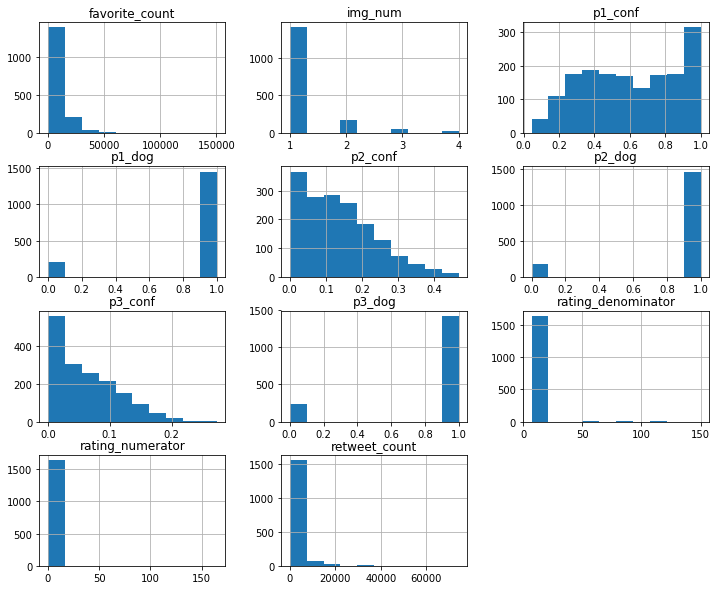

In [77]:
#Show histogram of full data
df_full.hist(figsize=(12,10));

- **Most common number of pictures in tweets**   

To answer this question, let's see the number of unique values contained in the image column

In [78]:
df_full['img_num'].value_counts()

1    1402
2     169
3      58
4      27
Name: img_num, dtype: int64

We see that tweets with one picture are the most common

- **Most retweeted photo or video**   

To answer this question, we figure out the max value in `retweet_count` column and and then find a description and link to this tweet

In [79]:
df_full.retweet_count.max()

74299

In [80]:
link = df_full.query('retweet_count == 74299')

In [81]:
#Find a description and link of this tweet in the dataframe
print(link['text'].values)
print(link['expanded_urls'].values)

[ "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"]
['https://twitter.com/dog_rates/status/744234799360020481/video/1']


Now, having a link to this video tweet, we can look at this nice dog that got the maximum number of retweets

- **Top 10 popular dog names**   

Let's find the number of unique values contained in the `name` column, except for rows where there are no names. Then we will display the distribution of the popularity of names on a plot.

In [82]:
name_counts = df_full.query('name != "No name"')
name_counts['name'].value_counts()[:10]

Cooper     10
Tucker     10
Penny       9
Lucy        9
Charlie     9
Oliver      9
Daisy       7
Sadie       7
Winston     7
Lola        7
Name: name, dtype: int64

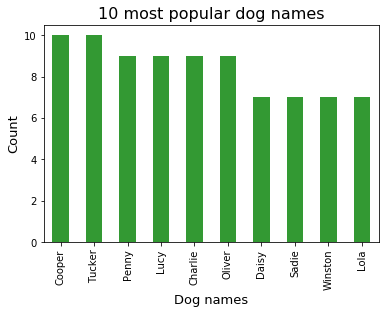

In [83]:
name_counts['name'].value_counts()[:10].plot(kind = 'bar', color='g', alpha = .8);
plt.xlabel('Dog names', size=13);
plt.ylabel('Count', size=13);
plt.title('10 most popular dog names', size=16);

We see that the leading position in the top 10 popular dog names are shared by the names Tucker and Cooper

- **Figure out the percentages of the most common developmental stages of dogs in our dataframe**   

Create a pie chart with different dog stage values as a percentage ratio except for rows where there are no dog stage

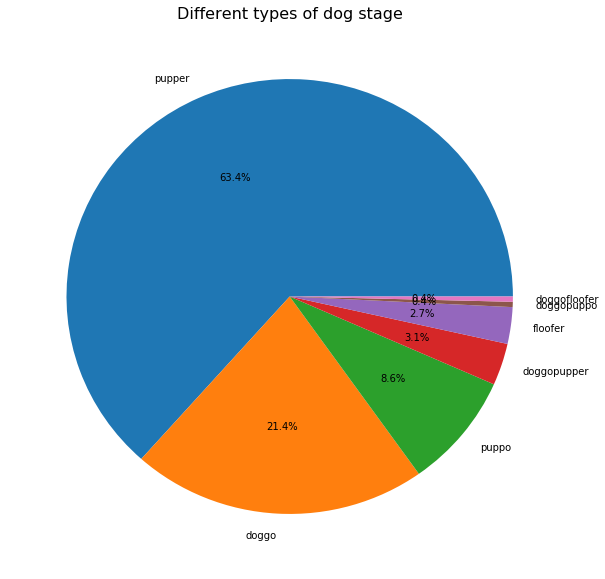

In [84]:
#Create a pie plot with the different percentages of dog stage value
df_full.query('dog_stage != "undefined"').dog_stage.value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10));
plt.title('Different types of dog stage', size=16)
plt.ylabel('')
plt.show()

Most of the stages of dogs are pupper (63.4%) 

- **Top 5 common dog breeds in our dataset**   


In [85]:
#Create a single list of all available dog breeds from the all dataset
full_list = list(df_full['p1']) + list(df_full['p2']) + list(df_full['p3'])

#Show number of rows in the created list
print(len(full_list))

4968


In [86]:
#Sort the list of dog breeds by frequency of occurrence in the data frame
count_repetitions_breeds = Counter(full_list).most_common(5)

#Show the five most common dog breeds
print(count_repetitions_breeds)

[('Golden_retriever', 278), ('Labrador_retriever', 272), ('Chihuahua', 177), ('Pembroke', 138), ('Cardigan', 111)]


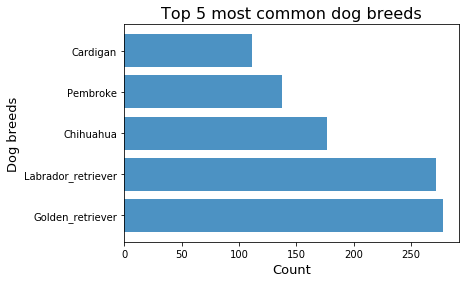

In [87]:
#Create a plot with top five common dog breeds
locations = [1, 2, 3, 4, 5]
heights = [278, 272, 177, 138, 111]
labels = ['Golden_retriever', 'Labrador_retriever', 'Chihuahua', 'Pembroke', 'Cardigan']
plt.barh(locations, heights, tick_label = labels, alpha = .8);
plt.title('Top 5 most common dog breeds', size=16);
plt.xlabel('Count', size=13);
plt.ylabel('Dog breeds', size=13);

- **Which of the predictions turned out to be the most accurate on average**   

To answer this question, let us find the average of each of the predictions

In [88]:
print('First prediction:', df_full.p1_conf.mean())
print('Second prediction:', df_full.p2_conf.mean()) 
print('Third prediction:', df_full.p3_conf.mean())

First prediction: 0.604221348792
Second prediction: 0.137369573123
Third prediction: 0.0618175578017


- **It is logical to assume that there is a correlation between `retweet_count` and `favorite_count`, let's take a look at it**   

Let's take a look at this by creating a regression plot between these two quantitative variables

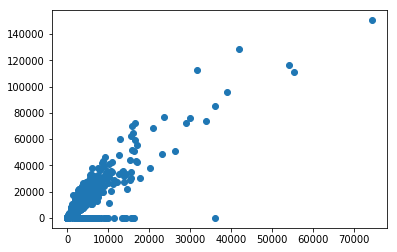

In [89]:
plt.scatter(df_full['retweet_count'], df_full['favorite_count']);

As expected, we see a fairly pronounced positive correlation between `retweet_count` and `favorite_count`

- **Finding the value of the correlation coefficient between `retweet_count` and `favorite_count` to find out how strong this dependence**    

Let's use the corr() function from the Pandas library to find the correlation coefficient

In [90]:
correlation = df_full[['retweet_count','favorite_count']].copy()
r = correlation.corr()
print(r['retweet_count'])

retweet_count     1.00000
favorite_count    0.86381
Name: retweet_count, dtype: float64


The value of the correlation coefficient (r=0.86) is between 0.7 and 1.0, which indicates a 'Strong positive relationship'